1.installing the necessary libraries required

In [1]:
# xarray is used to deal with netCDF data
%pip install xarray
# tephi is used to plot tephigrams
%pip install tephi
# cartopy is used to plot spatial (map) data
%pip install cartopy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


2.load the downloade libraries

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import tephi
import numpy as np

3.read data

In [3]:
data = xr.open_dataset('E:/jupyter notebook/DATA/QC_sonde_training_data.nc')
print(data)

<xarray.Dataset> Size: 1MB
Dimensions:              (pressure: 820, intended_launchtime: 32)
Coordinates:
  * pressure             (pressure) int64 7kB 830 829 828 827 ... 14 13 12 11
    launchtime           (intended_launchtime) datetime64[ns] 256B ...
  * intended_launchtime  (intended_launchtime) datetime64[ns] 256B 2024-03-01...
Data variables:
    geopot               (pressure, intended_launchtime) float64 210kB ...
    temperature          (pressure, intended_launchtime) float64 210kB ...
    humidity             (pressure, intended_launchtime) float64 210kB ...
    dewpoint             (pressure, intended_launchtime) float64 210kB ...
    wind_dir             (pressure, intended_launchtime) float64 210kB ...
    wind_speed           (pressure, intended_launchtime) float64 210kB ...
    time                 (pressure, intended_launchtime) datetime64[ns] 210kB ...
Attributes:
    Title:             DRYCAB radiosonde
    release_site:      Dagoretti Corner
    lat:               

4.humidity heat map

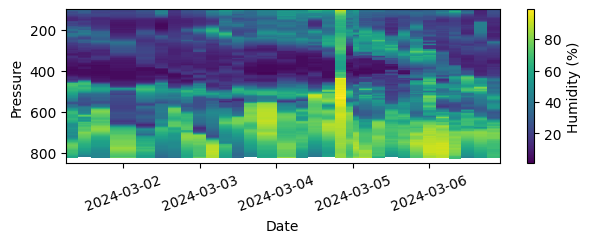

In [4]:
# create figure
fig, ax = plt.subplots(figsize=[7,2])
# plot data
plot = ax.pcolormesh(data['intended_launchtime'], data['pressure'], data['humidity'])
# set y axes limits
ax.set_ylim(850,100)
# add axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Pressure')
# rotate x axis labels 20 degrees
ax.tick_params(axis='x', rotation=20)
# add colorbar
cbar = plt.colorbar(plot, orientation='vertical')
cbar.set_label('Humidity (%)')
# show plot
plt.show()

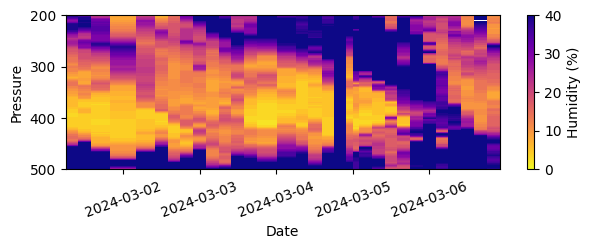

In [5]:
# create figure
fig, ax = plt.subplots(figsize=[7,2])
# plot data
plot = ax.pcolormesh(data['intended_launchtime'], data['pressure'], data['humidity'], cmap='plasma_r', vmin=0, vmax=40)
# set y axis limits
ax.set_ylim(500,200)
# add axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Pressure')
# rotate x axis labels 20 degrees
ax.tick_params(axis='x', rotation=20)
# add colorbar
cbar = plt.colorbar(plot, orientation='vertical')
cbar.set_label('Humidity (%)')
# show plot
plt.show()

5. dewpoint timeseries analysis

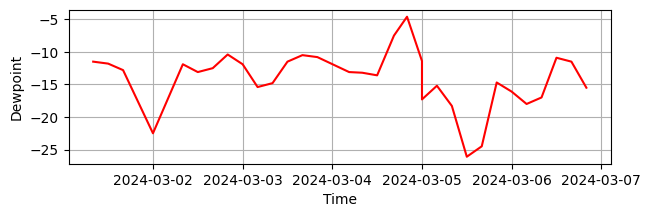

In [6]:
# select the 500hPa pressure level
data_500 = data.sel(pressure=500)
# create plot
fig, ax = plt.subplots(figsize=[7,2])
# plot data
ax.plot(data_500['intended_launchtime'], data_500['dewpoint'], color='red', linestyle='-')
# format
ax.set_ylabel('Dewpoint')
ax.set_xlabel('Time')
ax.grid()
# show
plt.show()


6.altitude graph

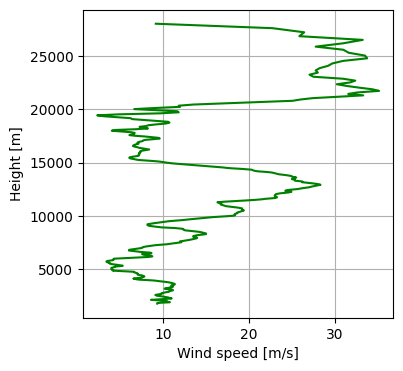

In [7]:
# select a single radiosonde by 'intended_launchtime'
sonde_data = data.sel(intended_launchtime='2024-03-05T12:00:00.000000000')
# create figure
fig, ax = plt.subplots(figsize=[4,4])
# plot data
ax.plot(sonde_data['wind_speed'], sonde_data['geopot'],color='green')
# format
ax.set_ylabel('Height [m]')
ax.set_xlabel('Wind speed [m/s]')
ax.grid()
# show
plt.show()


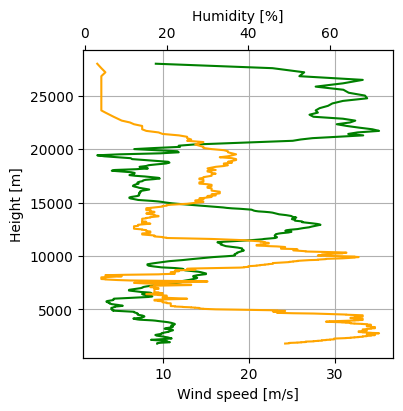

In [8]:
# select a single radiosonde by 'intended_launchtime'
sonde_data = data.sel(intended_launchtime='2024-03-05T12:00:00.000000000')
# create figure
fig, ax = plt.subplots(figsize=[4,4])
# plot data on first axis
ax.plot(sonde_data['wind_speed'], sonde_data['geopot'],color='green')
# add a twin y axis
ax2=ax.twiny()
# plot data on twin y axis
ax2.plot(sonde_data['humidity'], sonde_data['geopot'],color='orange')
# format
ax.set_ylabel('Height [m]')
ax.set_xlabel('Wind speed [m/s]')
ax2.set_xlabel('Humidity [%]')
ax.grid()
# show
plt.show()

7.tephigram

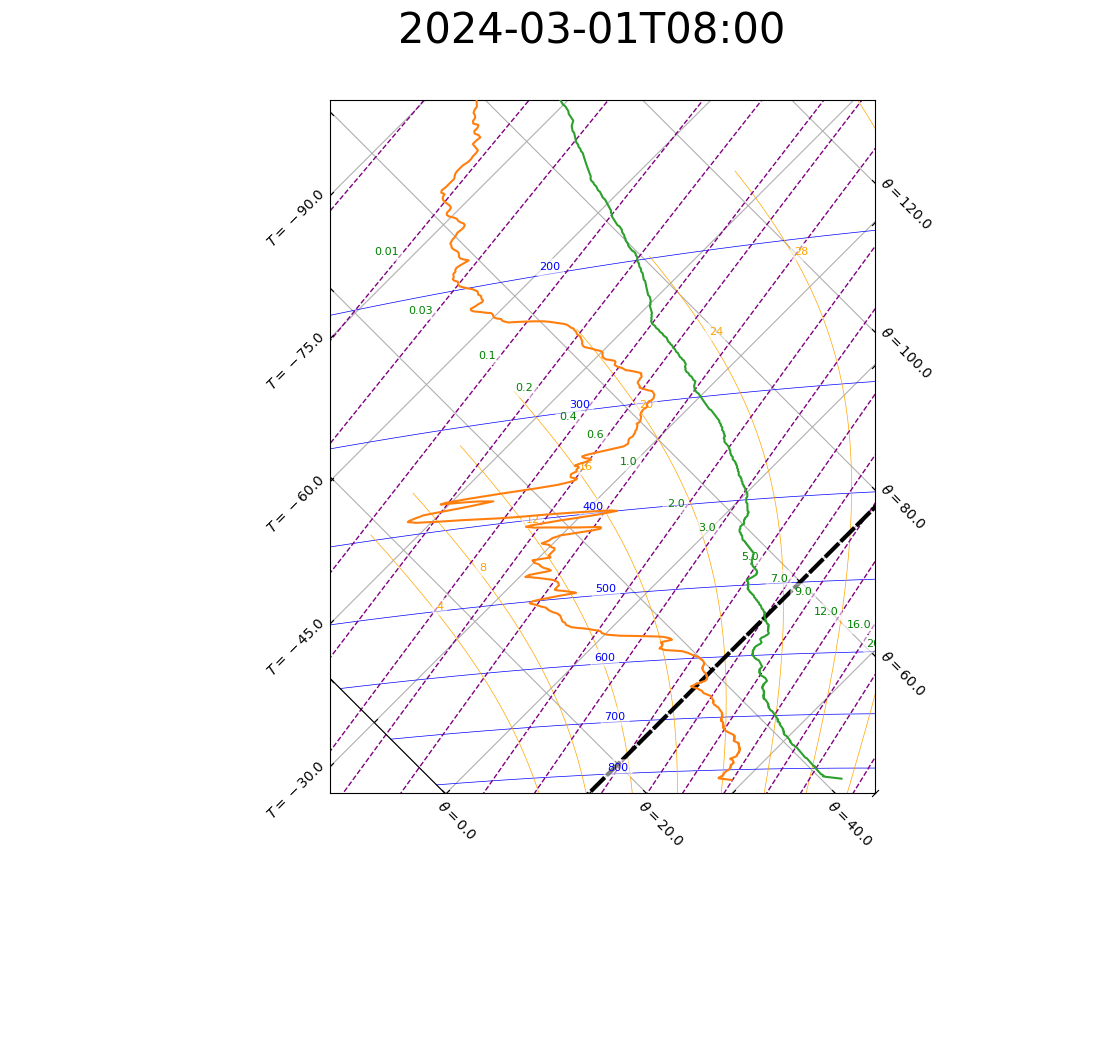

In [9]:
# select a single radiosonde by 'intended_launchtime'
sonde_data = data.sel(intended_launchtime='2024-03-05T12:00:00.000000000')
# use zip() to contain the data
dewpoint_zip = zip(sonde_data['pressure'], sonde_data['dewpoint'])
temp_zip = zip(sonde_data['pressure'], sonde_data['temperature'])
# add mixing ratio lines
tephi.MIXING_RATIO_LINE.update({'color': 'purple', 'linewidth': 1, 'linestyle': '--'})
# set plot limts
tpg = tephi.Tephigram(anchor=[(850, 30), (100, -100)])
# plot dewpoint
profile = tpg.plot(dewpoint_zip)
# plot temperature
tpg.plot(temp_zip)
# add a title
plt.suptitle('2024-03-01T08:00', fontsize=30)
# show
plt.show()

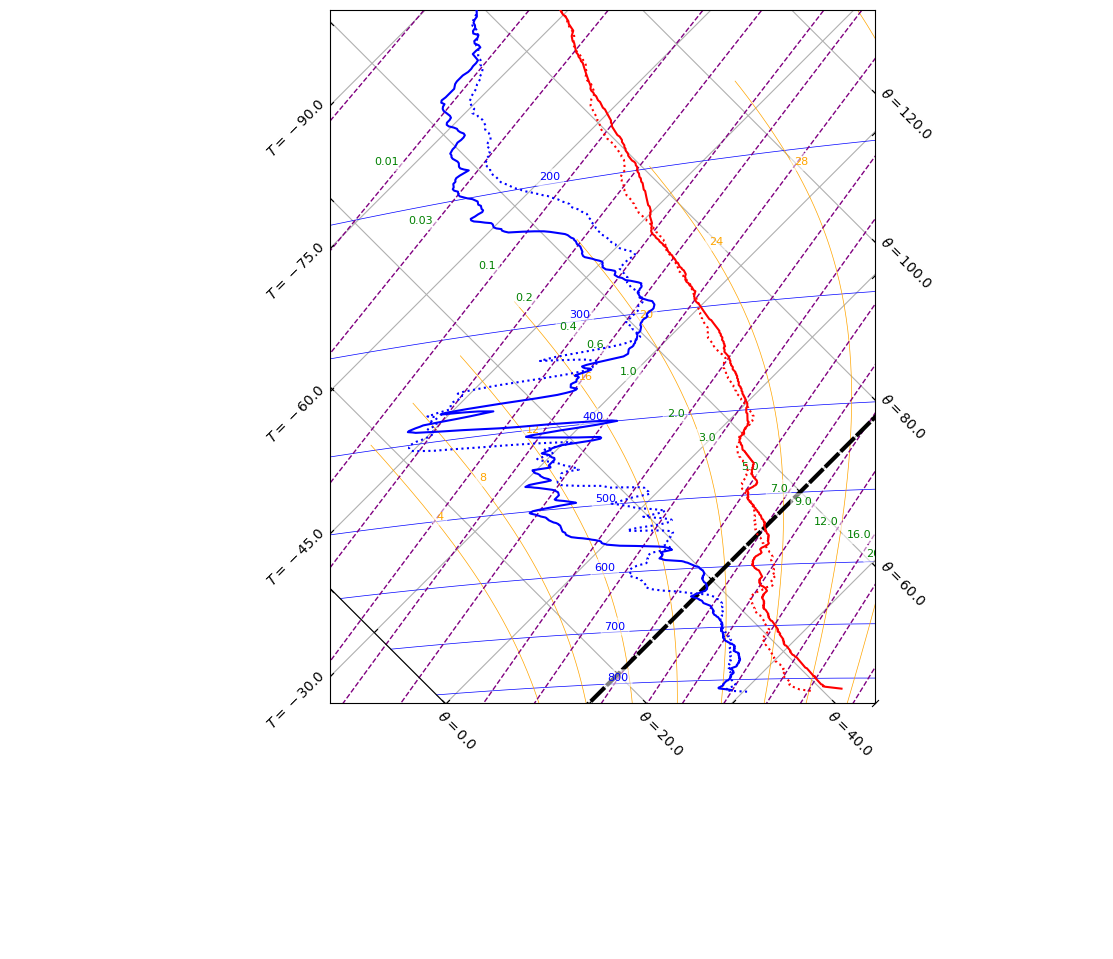

In [10]:
# select two radiosondes
sonde_data_1 = data.sel(intended_launchtime='2024-03-05T08:00:00.000000000')
sonde_data_2 = data.sel(intended_launchtime='2024-03-05T12:00:00.000000000')
# zip data for radiosonde 1
dewpoint_zip_1 = zip(sonde_data_1['pressure'], sonde_data_1['dewpoint'])
temp_zip_1 = zip(sonde_data_1['pressure'], sonde_data_1['temperature'])
# zip data for radiosonde 2
dewpoint_zip_2 = zip(sonde_data_2['pressure'], sonde_data_2['dewpoint'])
temp_zip_2 = zip(sonde_data_2['pressure'], sonde_data_2['temperature'])
# create plot
tephi.MIXING_RATIO_LINE.update({'color': 'purple', 'linewidth': 1, 'linestyle': '--'})
tpg = tephi.Tephigram(anchor=[(850, 30), (100, -100)])
# plot radiosonde 1 data
profile = tpg.plot(dewpoint_zip_1, linestyle=':', color='blue')
tpg.plot(temp_zip_1, linestyle=':', color='red')
# plot radiosonde 2 data
profile = tpg.plot(dewpoint_zip_2, color='blue')
tpg.plot(temp_zip_2, color='red')
# show
plt.show()